In [8]:
import numpy as np  # NumPy: For numerical and array operations.
import pandas as pd  # Pandas: For data manipulation and analysis.
import matplotlib.pyplot as plt  # Matplotlib: For creating various types of plots and charts.
import seaborn as sns  # Seaborn: For making data visualizations more attractive and informative.

## for tables
from tabulate import tabulate
from IPython.display import display, HTML

In [9]:
df = pd.read_csv("data/clean_data.csv")
SAM_US = pd.read_csv("data/October-Target-SAM-List-US-All.csv")
SAM_CAN = pd.read_csv("data/October-Target-SAM-List-CAN-All.csv")

df_id = df['ID']

SAM_US_2 = SAM_US[SAM_US['Snowball Map'].isin(df_id)]
SAM_CAN_2 = SAM_CAN[SAM_CAN['Snowball Map'].isin(df_id)]

df22 = df[['ID','drop', 'submit_form','visit_again','inbound_call','Date']]

combined_df = pd.concat([SAM_US_2, SAM_CAN_2], ignore_index=True)
combined_df = combined_df.merge(df22, left_on = 'Snowball Map', right_on = 'ID')


combined_df.to_csv("data/combined_df.csv")

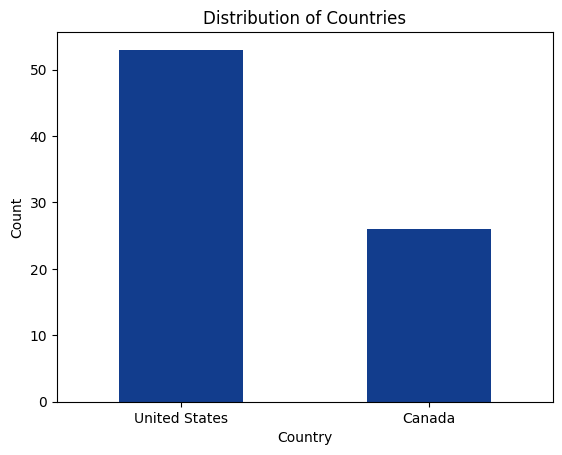

In [10]:
import matplotlib.pyplot as plt

country_counts = combined_df['Country'].value_counts()

# Plotting the bar chart
country_counts.plot(kind='bar', color='#123d8d')
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig("plot/counts_by_country.png")  # Save as PNG image
plt.show()


In [11]:
# Assuming your DataFrame is named SAM_CAN_2
country_counts = combined_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

country_counts.style  ##.background_gradient(cmap=cm)


,Country,Count
0,United States,53
1,Canada,26


In [12]:
# Assuming your DataFrame is named SAM_CAN_2
country_counts = combined_df.groupby(['Country', 'drop']).size().reset_index(name='Count')

# Use pivot_table to reshape the DataFrame
summary_table = country_counts.pivot_table(index='Country', columns='drop', values='Count', fill_value=0)

# Display the summary table
summary_table.style

drop,drop1,drop1-prospect,drop2
Country,,,
Canada,6.000000,13.000000,7.000000
United States,14.000000,22.000000,17.000000


FileNotFoundError: [Errno 2] No such file or directory: '/Users/yuka/Desktop/Wonders/October-DM-Analysis/plot/counts_by_stats_us.png'

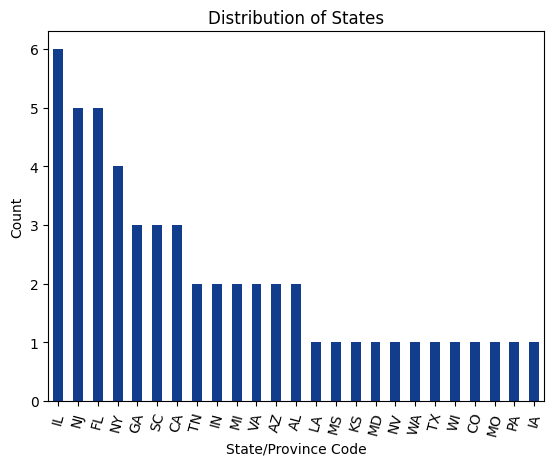

In [13]:
# Assuming your DataFrame is named combined_df
country_counts = SAM_US_2['State/Province Code'].value_counts()

# Plotting the bar chart
country_counts.plot(kind='bar', color='#123d8d')
plt.title('Distribution of States')
plt.xlabel('State/Province Code')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.savefig("/Users/yuka/Desktop/Wonders/October-DM-Analysis/plot/counts_by_stats_us.png")  # Save as PNG image
plt.show()


In [ ]:
grouped_summary = (
    combined_df[combined_df['Country'] == 'United States']
    .groupby(['State/Province Code', 'drop'])
    .size()
    .reset_index(name='Counts')
    .pivot_table(index='State/Province Code', columns='drop', values='Counts', fill_value=0)
    .assign(Total=lambda x: x.sum(axis=1))
    .sort_values(by='Total', ascending=False)
)

# Display the summarized DataFrame
grouped_summary.style


In [ ]:
# Assuming your DataFrame is named combined_df
country_counts = SAM_CAN_2['State/Province Code'].value_counts()

# Plotting the bar chart
country_counts.plot(kind='bar', color='#123d8d')
plt.title('Distribution of States')
plt.xlabel('State/Province Code')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.savefig("/Users/yuka/Desktop/Wonders/October-DM-Analysis/plot/counts_by_stats_canada.png")  # Save as PNG image
plt.show()


In [ ]:
grouped_summary = (
    combined_df[combined_df['Country'] == 'Canada']
    .groupby(['State/Province Code', 'drop'])
    .size()
    .reset_index(name='Counts')
    .pivot_table(index='State/Province Code', columns='drop', values='Counts', fill_value=0)
    .assign(Total=lambda x: x.sum(axis=1))
    .sort_values(by='Total', ascending=False)
)

# Display the summarized DataFrame
grouped_summary.style

In [ ]:
# Assuming your DataFrame is named combined_df

cuisine_counts = (
    combined_df
    .groupby(['Cuisines (Regional)','drop'])
    .size()
    .reset_index(name='Counts')
    .pivot_table(index='Cuisines (Regional)', columns='drop', values='Counts', fill_value=0)
    .assign(Total=lambda x: x.sum(axis=1))
    .sort_values(by='Total', ascending=False)
)

import seaborn as sns


country_counts = combined_df['Cuisines (Regional)'].value_counts()

sns.barplot(x=country_counts.index, y=country_counts.values, color='#123d8d')
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Types')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.savefig("/Users/yuka/Desktop/Wonders/October-DM-Analysis/plot/cuisines.png")
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Assuming your DataFrame is named combined_df
cuisine_counts = (
    combined_df
    .groupby(['Cuisines (Regional)', 'drop'])
    .size()
    .reset_index(name='Counts')
    .pivot_table(index='Cuisines (Regional)', columns='drop', values='Counts', fill_value=0)
    .assign(Total=lambda x: x.sum(axis=1))
    .sort_values(by='Total', ascending=False)
)
cuisine_counts.style

In [ ]:

# Use textwrap to wrap long labels
wrapped_labels = [textwrap.fill(label, width=15) for label in cuisine_counts.index]

# Create a new DataFrame with the wrapped labels and corresponding values
wrapped_df = pd.DataFrame({
    'Cuisine Types': wrapped_labels,
    'Count': cuisine_counts.sum(axis=1).values  # Sum along the columns to get total count
})

# Plotting the bar chart
plt.figure(figsize=(20, 3))  # Adjust the size as needed

country_counts = wrapped_df.plot(kind='bar', x='Cuisine Types', y='Count', color='#123d8d')

plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Types')
plt.ylabel('Count')
plt.xticks(rotation=70, ha='right')  # Set rotation to 0 and adjust horizontal alignment
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig("/Users/yuka/Desktop/Wonders/October-DM-Analysis/plot/cuisines.png")  # Save as PNG image
plt.show()
